In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8w7y-2bfp", limit=800000)

# Convert to pandas DataFrame
datos_df = pd.DataFrame.from_records(results)

datos_df

C:\Users\Isabel\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,curs,sexe,grup_edat,resid_ncia_municipi_alumne,codi_resid_ncia_municipi,municipi_centre,codi_municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,ABRERA,08001,EDUCACIÓ INFANTIL,PÚBLIC,38
1,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,ESPARREGUERA,08076,EDUCACIÓ INFANTIL,PRIVAT,1
2,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,L'HOSPITALET DE LLOBREGAT,08101,EDUCACIÓ INFANTIL,PÚBLIC,1
3,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,OLESA DE MONTSERRAT,08147,EDUCACIÓ INFANTIL,PRIVAT,8
4,2016/2017,DONA,De 3 a 5 anys,ABRERA,08001,OLESA DE MONTSERRAT,08147,EDUCACIÓ INFANTIL,PÚBLIC,1
...,...,...,...,...,...,...,...,...,...,...
779879,2021/2022,HOME,Major de 20 anys,BADALONA,08015,BADALONA,08015,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779880,2021/2022,HOME,Major de 20 anys,BARCELONA,08019,BARCELONA,08019,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779881,2021/2022,HOME,Major de 20 anys,BARCELONA,08019,BADALONA,08015,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
779882,2021/2022,HOME,Major de 20 anys,VIC,08298,VIC,08298,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1


In [2]:
datos=datos_df

In [3]:
#quitamos la columna de sexo y los códigos de municipios
datos_df=datos_df.drop(['sexe','codi_resid_ncia_municipi','codi_municipi_centre'], axis=1)



In [4]:
#Separamos por cursos

groups=datos_df.groupby(datos_df.curs)
curs_16_17_df=groups.get_group("2016/2017")
curs_17_18_df=groups.get_group("2017/2018")
curs_18_19_df=groups.get_group("2018/2019")
curs_19_20_df=groups.get_group("2019/2020")
curs_20_21_df=groups.get_group("2020/2021")
curs_21_22_df=groups.get_group("2021/2022")

In [5]:
#Reseteamos los indices
curs_16_17_df=curs_16_17_df.reset_index()
curs_17_18_df=curs_17_18_df.reset_index()
curs_18_19_df=curs_18_19_df.reset_index()
curs_19_20_df=curs_19_20_df.reset_index()
curs_20_21_df=curs_20_21_df.reset_index()
curs_21_22_df=curs_21_22_df.reset_index()



curs_21_22_df

,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,131831,2021/2022,Major de 20 anys,VIC,VIC,FORMACIÓ PROFESSIONAL,PÚBLIC,1
1,132500,2021/2022,Major de 20 anys,SANT CELONI,GIRONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
2,136000,2021/2022,Major de 20 anys,LINYOLA,MOLLERUSSA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
3,137477,2021/2022,Major de 20 anys,LLEIDA,LLEIDA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
4,138173,2021/2022,Major de 20 anys,LA VALL DE BIANYA,OLOT,FORMACIÓ PROFESSIONAL,PÚBLIC,1
...,...,...,...,...,...,...,...,...
132937,779879,2021/2022,Major de 20 anys,BADALONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
132938,779880,2021/2022,Major de 20 anys,BARCELONA,BARCELONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
132939,779881,2021/2022,Major de 20 anys,BARCELONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
132940,779882,2021/2022,Major de 20 anys,VIC,VIC,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1


In [6]:
#Para el curso 21/22 vamos a separar en dos tablas, en funcion de si se desplazan de municipio o no para estudiar
curs_21_22=curs_21_22_df


In [7]:

indice_no = []#guardamos el índice que nos indica donde no se mueven
indice_si=[]#guardamos el índice donde si se mueven
for i in range(len(curs_21_22_df)):
    if ((curs_21_22_df["resid_ncia_municipi_alumne"][i])==(curs_21_22_df["municipi_centre"][i])):
        indice_no.append(i)
    if((curs_21_22_df["resid_ncia_municipi_alumne"][i])!=(curs_21_22_df["municipi_centre"][i])):
        indice_si.append(i)
curs_21_22_df

,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,131831,2021/2022,Major de 20 anys,VIC,VIC,FORMACIÓ PROFESSIONAL,PÚBLIC,1
1,132500,2021/2022,Major de 20 anys,SANT CELONI,GIRONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
2,136000,2021/2022,Major de 20 anys,LINYOLA,MOLLERUSSA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
3,137477,2021/2022,Major de 20 anys,LLEIDA,LLEIDA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
4,138173,2021/2022,Major de 20 anys,LA VALL DE BIANYA,OLOT,FORMACIÓ PROFESSIONAL,PÚBLIC,1
...,...,...,...,...,...,...,...,...
132937,779879,2021/2022,Major de 20 anys,BADALONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
132938,779880,2021/2022,Major de 20 anys,BARCELONA,BARCELONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
132939,779881,2021/2022,Major de 20 anys,BARCELONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
132940,779882,2021/2022,Major de 20 anys,VIC,VIC,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1


In [8]:
#quitamos las filas donde no se deplazan
curs_21_22_si=curs_21_22.drop(indice_no, axis=0)


In [9]:
#quitamos las filas donde si se desplazan
curs_21_22_no=curs_21_22_df.drop(indice_si, axis=0)


In [10]:

curs_21_22_no=curs_21_22_no.reset_index()
curs_21_22_no

,level_0,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,0,131831,2021/2022,Major de 20 anys,VIC,VIC,FORMACIÓ PROFESSIONAL,PÚBLIC,1
1,3,137477,2021/2022,Major de 20 anys,LLEIDA,LLEIDA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
2,6,141959,2021/2022,Major de 20 anys,LLEIDA,LLEIDA,FORMACIÓ PROFESSIONAL,PRIVAT,1
3,7,145808,2021/2022,Major de 20 anys,LLEIDA,LLEIDA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
4,14,156521,2021/2022,Major de 20 anys,TARRAGONA,TARRAGONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
...,...,...,...,...,...,...,...,...,...
29650,132935,779877,2021/2022,Major de 20 anys,BARCELONA,BARCELONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
29651,132937,779879,2021/2022,Major de 20 anys,BADALONA,BADALONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
29652,132938,779880,2021/2022,Major de 20 anys,BARCELONA,BARCELONA,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1
29653,132940,779882,2021/2022,Major de 20 anys,VIC,VIC,ARTS PLÀSTIQUES I DISSENY,PÚBLIC,1


In [11]:
curs_21_22_si=curs_21_22_si.reset_index()
curs_21_22_si

,level_0,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,1,132500,2021/2022,Major de 20 anys,SANT CELONI,GIRONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
1,2,136000,2021/2022,Major de 20 anys,LINYOLA,MOLLERUSSA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
2,4,138173,2021/2022,Major de 20 anys,LA VALL DE BIANYA,OLOT,FORMACIÓ PROFESSIONAL,PÚBLIC,1
3,5,139354,2021/2022,Major de 20 anys,LLANÇÀ,BANYOLES,FORMACIÓ PROFESSIONAL,PÚBLIC,1
4,8,145991,2021/2022,Major de 20 anys,LLEIDA,MOLLERUSSA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
...,...,...,...,...,...,...,...,...,...
103282,132924,779866,2021/2022,Major de 20 anys,SABADELL,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
103283,132927,779869,2021/2022,Major de 20 anys,TORRELAVIT,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
103284,132932,779874,2021/2022,Major de 20 anys,LLEIDA,LES BORGES BLANQUES,FORMACIÓ PROFESSIONAL,PÚBLIC,1
103285,132936,779878,2021/2022,Major de 20 anys,SITGES,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1


In [12]:
#Vamos a contabilizar el número de estudiantes que se desplazan en funcion de la edad y del tipo de centro
import numpy as np
publico_si=np.zeros(6)
privado_si=np.zeros(6)
for i in range(len(curs_21_22_si)):
    if (curs_21_22_si["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_21_22_si["grup_edat"][i]=="2 o menys anys"):
             publico_si[0]=publico_si[0]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 3 a 5 anys"):
             publico_si[1]=publico_si[1]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 6 a 11 anys"):
             publico_si[2]=publico_si[2]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 12 a 15 anys"):
             publico_si[3]=publico_si[3]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 16 a 20 anys"):
             publico_si[4]=publico_si[4]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="Major de 20 anys"):
             publico_si[5]=publico_si[5]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
    if (curs_21_22_si["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_21_22_si["grup_edat"][i]=="2 o menys anys"):
             privado_si[0]=privado_si[0]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 3 a 5 anys"):
             privado_si[1]=privado_si[1]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 6 a 11 anys"):
             privado_si[2]=privado_si[2]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 12 a 15 anys"):
             privado_si[3]=privado_si[3]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="De 16 a 20 anys"):
             privado_si[4]=privado_si[4]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["grup_edat"][i]=="Major de 20 anys"):
             privado_si[5]=privado_si[5]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
publico_si_21_22=publico_si
privado_si_21_22=privado_si
print(publico_si)
print(privado_si)

[ 1086.  8846. 22269. 31713. 57382. 17334.]
[  624.  8762. 23668. 21060. 30611.  5735.]


In [13]:
publico_no=np.zeros(6)
privado_no=np.zeros(6)
for i in range(len(curs_21_22_no)):
    if (curs_21_22_no["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_21_22_no["grup_edat"][i]=="2 o menys anys"):
             publico_no[0]=publico_no[0]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 3 a 5 anys"):
             publico_no[1]=publico_no[1]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 6 a 11 anys"):
             publico_no[2]=publico_no[2]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 12 a 15 anys"):
             publico_no[3]=publico_no[3]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 16 a 20 anys"):
             publico_no[4]=publico_no[4]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="Major de 20 anys"):
             publico_no[5]=publico_no[5]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
    if (curs_21_22_no["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_21_22_no["grup_edat"][i]=="2 o menys anys"):
             privado_no[0]=privado_no[0]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 3 a 5 anys"):
             privado_no[1]=privado_no[1]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 6 a 11 anys"):
             privado_no[2]=privado_no[2]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 12 a 15 anys"):
             privado_no[3]=privado_no[3]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="De 16 a 20 anys"):
             privado_no[4]=privado_no[4]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_no["grup_edat"][i]=="Major de 20 anys"):
             privado_no[5]=privado_no[5]+int(curs_21_22_no["n_mero_matr_cules_estad_stica"][i])
publico_no_21_22=publico_no
privado_no_21_22=privado_no
print(publico_no)
print(privado_no)

[  7025. 127761. 288636. 184823.  90199.  12841.]
[  3669.  52638. 123814.  94084.  38221.   4290.]


In [14]:
estudiantes_21_22=[]
for i in range (6):
    estudiantes_21_22.append(publico_no[i]+privado_no[i]+publico_si[i]+privado_si[i])
print(estudiantes_21_22)

[12404.0, 198007.0, 458387.0, 331680.0, 216413.0, 40200.0]


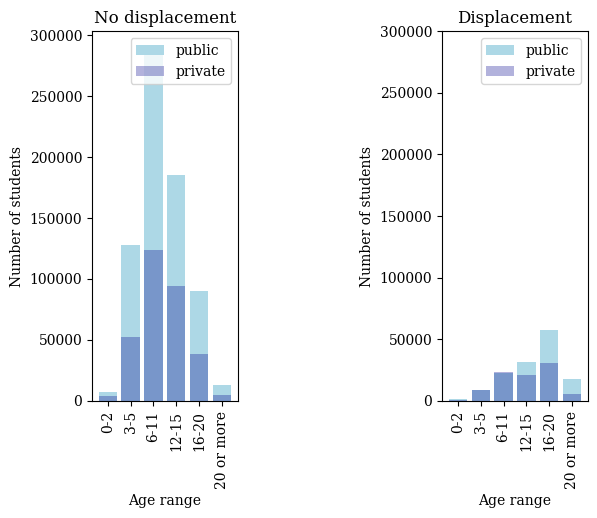

In [15]:
#Hacemos dos gráficas, una para cuando hay desplazamiento y otra para cuando no
#En cada gráfica ploteamos el número de estudiantes en función del rango de edad para centros públicos y privados
edades=["0-2","3-5","6-11","12-15","16-20","20 or more"]
import matplotlib.pyplot as plt
font = {"font.family" : "serif", 
        "mathtext.fontset" : "stix",
        "font.size": 10}
plt.rcParams.update(font)
plt.subplot(1, 3, 1)

plt.bar(edades,publico_no,color="lightblue",label="public")
plt.bar(edades,privado_no,color="darkblue",alpha=0.3,label="private")
plt.title("No displacement")
plt.xticks(rotation="vertical")
plt.xlabel("Age range")
plt.ylabel("Number of students")
plt.legend()


plt.subplot(1, 3, 3)
plt.ylim([0,300000])
plt.bar(edades,publico_si,color="lightblue",label="public")
plt.bar(edades,privado_si,color="darkblue",alpha=0.3,label="private")
plt.title("Displacement")
plt.xticks(rotation="vertical")
plt.xlabel("Age range")
plt.ylabel("Number of students")
plt.legend()

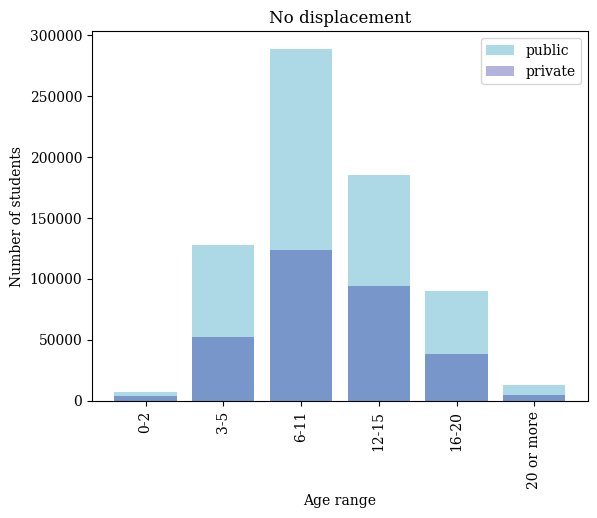

In [16]:
plt.bar(edades,publico_no,color="lightblue",label="public")
plt.bar(edades,privado_no,color="darkblue",alpha=0.3,label="private")
plt.title("No displacement")
plt.xticks(rotation="vertical")
plt.xlabel("Age range")
plt.ylabel("Number of students")
plt.legend()

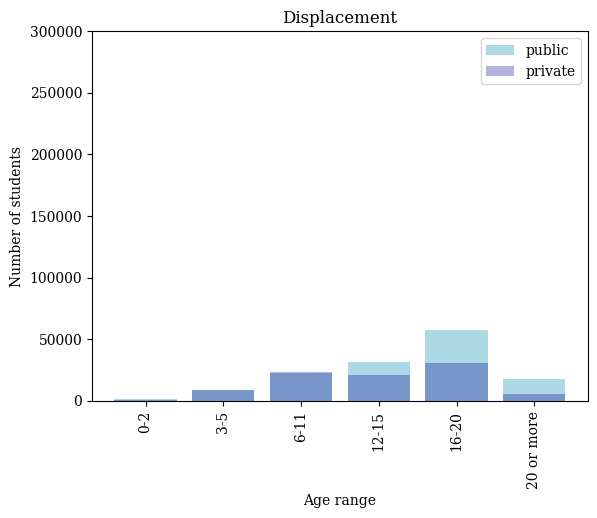

In [17]:
plt.ylim([0,300000])
plt.bar(edades,publico_si,color="lightblue",label="public")
plt.bar(edades,privado_si,color="darkblue",alpha=0.3,label="private")
plt.title("Displacement")
plt.xticks(rotation="vertical")
plt.xlabel("Age range")
plt.ylabel("Number of students")
plt.legend()

In [18]:
#Hacemos lo mismo para el curso 2016/2017
#Para el curso 16/17 vamos a separar en dos tablas, en funcion de si se desplazan de municipio o no para estudiar
curs_16_17=curs_16_17_df

In [19]:
indice_no = []#guardamos el índice que nos indica donde no se mueven
indice_si=[]#guardamos el índice donde si se mueven
for i in range(len(curs_16_17_df)):
    if ((curs_16_17_df["resid_ncia_municipi_alumne"][i])==(curs_16_17_df["municipi_centre"][i])):
        indice_no.append(i)
    if((curs_16_17_df["resid_ncia_municipi_alumne"][i])!=(curs_16_17_df["municipi_centre"][i])):
        indice_si.append(i)
#curs_16_17_df

In [20]:
curs_16_17_si=curs_16_17.drop(indice_no, axis=0)


In [21]:
curs_16_17_no=curs_16_17_df.drop(indice_si, axis=0)


In [22]:
curs_16_17_no=curs_16_17_no.reset_index()
curs_16_17_no

,level_0,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,0,0,2016/2017,De 3 a 5 anys,ABRERA,ABRERA,EDUCACIÓ INFANTIL,PÚBLIC,38
1,8,8,2016/2017,De 3 a 5 anys,AGRAMUNT,AGRAMUNT,EDUCACIÓ INFANTIL,PRIVAT,9
2,9,9,2016/2017,De 3 a 5 anys,AGRAMUNT,AGRAMUNT,EDUCACIÓ INFANTIL,PÚBLIC,15
3,13,13,2016/2017,De 3 a 5 anys,AGULLANA,AGULLANA,EDUCACIÓ INFANTIL,PÚBLIC,6
4,14,14,2016/2017,De 3 a 5 anys,AIGUAFREDA,AIGUAFREDA,EDUCACIÓ INFANTIL,PÚBLIC,11
...,...,...,...,...,...,...,...,...,...
28231,134299,134302,2016/2017,Major de 20 anys,L'HOSPITALET DE LLOBREGAT,L'HOSPITALET DE LLOBREGAT,FORMACIÓ PROFESSIONAL,PÚBLIC,1
28232,134304,134307,2016/2017,Major de 20 anys,BARCELONA,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
28233,134305,134308,2016/2017,Major de 20 anys,BARCELONA,BARCELONA,FORMACIÓ PROFESSIONAL,PÚBLIC,1
28234,134307,134310,2016/2017,Major de 20 anys,OLIANA,OLIANA,FORMACIÓ PROFESSIONAL,PÚBLIC,1


In [23]:
curs_16_17_si=curs_16_17_si.reset_index()
curs_16_17_si

,level_0,index,curs,grup_edat,resid_ncia_municipi_alumne,municipi_centre,estudis,naturalesa_centre,n_mero_matr_cules_estad_stica
0,1,1,2016/2017,De 3 a 5 anys,ABRERA,ESPARREGUERA,EDUCACIÓ INFANTIL,PRIVAT,1
1,2,2,2016/2017,De 3 a 5 anys,ABRERA,L'HOSPITALET DE LLOBREGAT,EDUCACIÓ INFANTIL,PÚBLIC,1
2,3,3,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PRIVAT,8
3,4,4,2016/2017,De 3 a 5 anys,ABRERA,OLESA DE MONTSERRAT,EDUCACIÓ INFANTIL,PÚBLIC,1
4,5,5,2016/2017,De 3 a 5 anys,ABRERA,SANT ESTEVE SESROVIRES,EDUCACIÓ INFANTIL,PÚBLIC,2
...,...,...,...,...,...,...,...,...,...
106071,134303,134306,2016/2017,Major de 20 anys,SANT QUIRZE DEL VALLÈS,SABADELL,FORMACIÓ PROFESSIONAL,PÚBLIC,1
106072,134306,134309,2016/2017,Major de 20 anys,LA SEU D'URGELL,MOLLERUSSA,FORMACIÓ PROFESSIONAL,PRIVAT,1
106073,134308,134311,2016/2017,Major de 20 anys,TORTOSA,FALSET,FORMACIÓ PROFESSIONAL,PÚBLIC,1
106074,134310,134313,2016/2017,Major de 20 anys,L'HOSPITALET DE LLOBREGAT,EL PRAT DE LLOBREGAT,FORMACIÓ PROFESSIONAL,PÚBLIC,1


In [24]:
#Vamos a contabilizar el número de estudiantes que se desplazan en funcion de la edad y del tipo de centro

publico_si=np.zeros(6)
privado_si=np.zeros(6)
for i in range(len(curs_16_17_si)):
    if (curs_16_17_si["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_16_17_si["grup_edat"][i]=="2 o menys anys"):
             publico_si[0]=publico_si[0]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 3 a 5 anys"):
             publico_si[1]=publico_si[1]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 6 a 11 anys"):
             publico_si[2]=publico_si[2]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 12 a 15 anys"):
             publico_si[3]=publico_si[3]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 16 a 20 anys"):
             publico_si[4]=publico_si[4]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="Major de 20 anys"):
             publico_si[5]=publico_si[5]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
    if (curs_16_17_si["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_16_17_si["grup_edat"][i]=="2 o menys anys"):
             privado_si[0]=privado_si[0]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 3 a 5 anys"):
             privado_si[1]=privado_si[1]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 6 a 11 anys"):
             privado_si[2]=privado_si[2]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 12 a 15 anys"):
             privado_si[3]=privado_si[3]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="De 16 a 20 anys"):
             privado_si[4]=privado_si[4]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_si["grup_edat"][i]=="Major de 20 anys"):
             privado_si[5]=privado_si[5]+int(curs_16_17_si["n_mero_matr_cules_estad_stica"][i])
publico_si_16_17=publico_si
privado_si_16_17=privado_si
                
print(publico_si)
print(privado_si)

[1.0000e+00 1.1778e+04 2.5896e+04 2.9676e+04 4.5466e+04 2.0409e+04]
[    0. 10834. 27729. 23762. 23543.  6051.]


In [25]:
publico_no=np.zeros(6)
privado_no=np.zeros(6)
for i in range(len(curs_16_17_no)):
    if (curs_16_17_no["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_16_17_no["grup_edat"][i]=="2 o menys anys"):
             publico_no[0]=publico_no[0]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 3 a 5 anys"):
             publico_no[1]=publico_no[1]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 6 a 11 anys"):
             publico_no[2]=publico_no[2]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 12 a 15 anys"):
             publico_no[3]=publico_no[3]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 16 a 20 anys"):
             publico_no[4]=publico_no[4]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="Major de 20 anys"):
             publico_no[5]=publico_no[5]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
    if (curs_16_17_no["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_16_17_no["grup_edat"][i]=="2 o menys anys"):
             privado_no[0]=privado_no[0]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 3 a 5 anys"):
             privado_no[1]=privado_no[1]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 6 a 11 anys"):
             privado_no[2]=privado_no[2]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 12 a 15 anys"):
             privado_no[3]=privado_no[3]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="De 16 a 20 anys"):
             privado_no[4]=privado_no[4]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
        if(curs_16_17_no["grup_edat"][i]=="Major de 20 anys"):
             privado_no[5]=privado_no[5]+int(curs_16_17_no["n_mero_matr_cules_estad_stica"][i])
                
publico_no_16_17=publico_no
privado_no_16_17=privado_no
print(publico_no)
print(privado_no)

[     0. 135991. 297554. 154845.  81568.  15922.]
[     0.  60822. 129334.  87664.  34748.   5124.]


In [26]:
estudiantes_16_17=[]
for i in range (6):
    estudiantes_16_17.append(publico_no[i]+privado_no[i]+publico_si[i]+privado_si[i])
print(estudiantes_16_17)
print(estudiantes_21_22)

[1.0, 219425.0, 480513.0, 295947.0, 185325.0, 47506.0]
[12404.0, 198007.0, 458387.0, 331680.0, 216413.0, 40200.0]


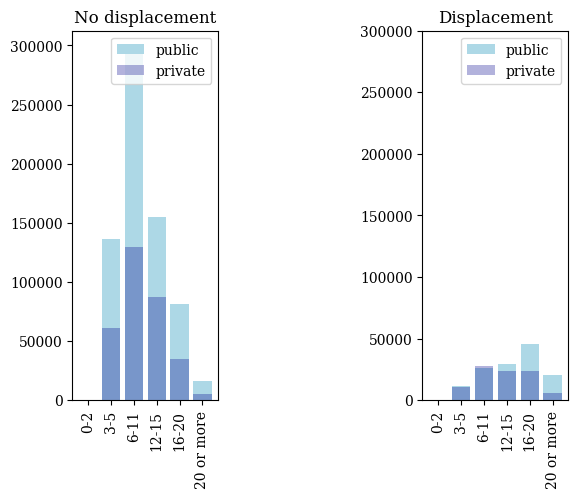

In [27]:
plt.subplot(1, 3, 1)

plt.bar(edades,publico_no,color="lightblue",label="public")
plt.bar(edades,privado_no,color="darkblue",alpha=0.3,label="private")
plt.title("No displacement")
plt.xticks(rotation="vertical")
plt.legend()


plt.subplot(1, 3, 3)
plt.ylim([0,300000])
plt.bar(edades,publico_si,color="lightblue",label="public")
plt.bar(edades,privado_si,color="darkblue",alpha=0.3,label="private")
plt.title("Displacement")
plt.xticks(rotation="vertical")
plt.legend()

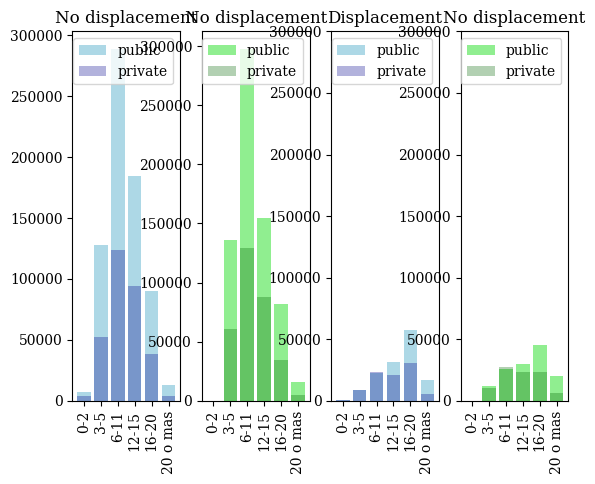

In [28]:
edades=["0-2","3-5","6-11","12-15","16-20","20 o mas"]
import matplotlib.pyplot as plt

plt.subplot(1, 4, 1)

plt.bar(edades,publico_no_21_22,color="lightblue",label="public")
plt.bar(edades,privado_no_21_22,color="darkblue",alpha=0.3,label="private")
plt.title("No displacement")
plt.xticks(rotation="vertical")
plt.legend()

plt.subplot(1, 4, 2)

plt.bar(edades,publico_no_16_17,color="lightgreen",label="public")
plt.bar(edades,privado_no_16_17,color="darkgreen",alpha=0.3,label="private")
plt.title("No displacement")
plt.xticks(rotation="vertical")
plt.legend()


plt.subplot(1, 4, 3)
plt.ylim([0,300000])
plt.bar(edades,publico_si_21_22,color="lightblue",label="public")
plt.bar(edades,privado_si_21_22,color="darkblue",alpha=0.3,label="private")
plt.title("Displacement")
plt.xticks(rotation="vertical")
plt.legend()

plt.subplot(1, 4, 4)
plt.ylim([0,300000])
plt.bar(edades,publico_si_16_17,color="lightgreen",label="public")
plt.bar(edades,privado_si_16_17,color="darkgreen",alpha=0.3,label="private")
plt.title("No displacement")
plt.xticks(rotation="vertical")
plt.legend()

In [29]:
print(publico_no_21_22)
print(privado_no_21_22)
print(publico_si_21_22)
print(privado_si_21_22)


[  7025. 127761. 288636. 184823.  90199.  12841.]
[  3669.  52638. 123814.  94084.  38221.   4290.]
[ 1086.  8846. 22269. 31713. 57382. 17334.]
[  624.  8762. 23668. 21060. 30611.  5735.]


In [30]:
print(publico_no_16_17)
print(privado_no_16_17)
print(publico_si_16_17)
print(privado_si_16_17)


[     0. 135991. 297554. 154845.  81568.  15922.]
[     0.  60822. 129334.  87664.  34748.   5124.]
[1.0000e+00 1.1778e+04 2.5896e+04 2.9676e+04 4.5466e+04 2.0409e+04]
[    0. 10834. 27729. 23762. 23543.  6051.]


In [31]:
#Vamos a ver que estudian a partir de los 16
FF=0 #Formacion Profesional
ESO=0 #Educación Secundaria Obligatoria
B=0#Bachillerato
EE=0#Educación Especial
A=0 #Artes plásticas y diseño


privado_si=np.zeros(6)
for i in range(len(curs_21_22_si)):
    if (curs_21_22_si["naturalesa_centre"][i]=="PÚBLIC"):
        if(curs_21_22_si["estudis"][i]=="FORMACIÓ PROFESSIONAL"):
             publico_si[0]=publico_si[0]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 3 a 5 anys"):
             publico_si[1]=publico_si[1]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 6 a 11 anys"):
             publico_si[2]=publico_si[2]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 12 a 15 anys"):
             publico_si[3]=publico_si[3]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 16 a 20 anys"):
             publico_si[4]=publico_si[4]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="Major de 20 anys"):
             publico_si[5]=publico_si[5]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
    if (curs_21_22_si["naturalesa_centre"][i]=="PRIVAT"):
        if(curs_21_22_si["estudis"][i]=="2 o menys anys"):
             privado_si[0]=privado_si[0]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 3 a 5 anys"):
             privado_si[1]=privado_si[1]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 6 a 11 anys"):
             privado_si[2]=privado_si[2]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 12 a 15 anys"):
             privado_si[3]=privado_si[3]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="De 16 a 20 anys"):
             privado_si[4]=privado_si[4]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
        if(curs_21_22_si["estudis"][i]=="Major de 20 anys"):
             privado_si[5]=privado_si[5]+int(curs_21_22_si["n_mero_matr_cules_estad_stica"][i])
publico_si_21_22=publico_si
privado_si_21_22=privado_si
print(publico_si)
print(privado_si)

[54327. 11778. 25896. 29676. 45466. 20409.]
[0. 0. 0. 0. 0. 0.]
